# 12. 고윳값 분해

<br>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
plt.rcParams.update({'font.size':14})

<br>

## 12.01. 고윳값과 고유벡터의 해석
- **고윳값 분해는 정방 행렬에 대해서만 정의됨**
    
    - **정방이 아닌 행렬은 SVD를 사용하여 분해할 수 있음**
- **$M\times M$ 크기의 모든 정방행렬에는 $M$개의 고윳값(스칼라)과 $M$개의 대응되는 고유벡터가 존재**

<br>

### 고윳값과 고유벡터의 기하학적 해석
- **행렬과 벡터를 특수하게 결합하면, 행렬이 벡터를 늘리기는 하지만, 회전시키지는 않을 수 있음**

    **이 벡터가 행렬의 고유벡터이며, 늘어나는 양이 고윳값**
    
<br>

- 왼쪽 그림의 두 벡터 ($v_1$과 $v_2$)는 고유벡터이지만, 오른쪽 그림의 두 벡터는 고유벡터가 아님

    **고유벡터는 행렬을 곱하기 전과 후에 같은 방향을 가리킴**
    
<br>

- **고유벡터는 행렬 벡터 곱셈이 스칼라-벡터 곱셈처럼 작동한다는 것을 의미**

    **행렬이 스칼라와 같다는 의미가 아니라, 동일한 벡터에 대해 미치는 효과가, 스칼라가 미치는 효과와 동일하다는 것**

<br>

#### 고윳값 방정식 (eigenvalue equation)

$$Av = \lambda v$$

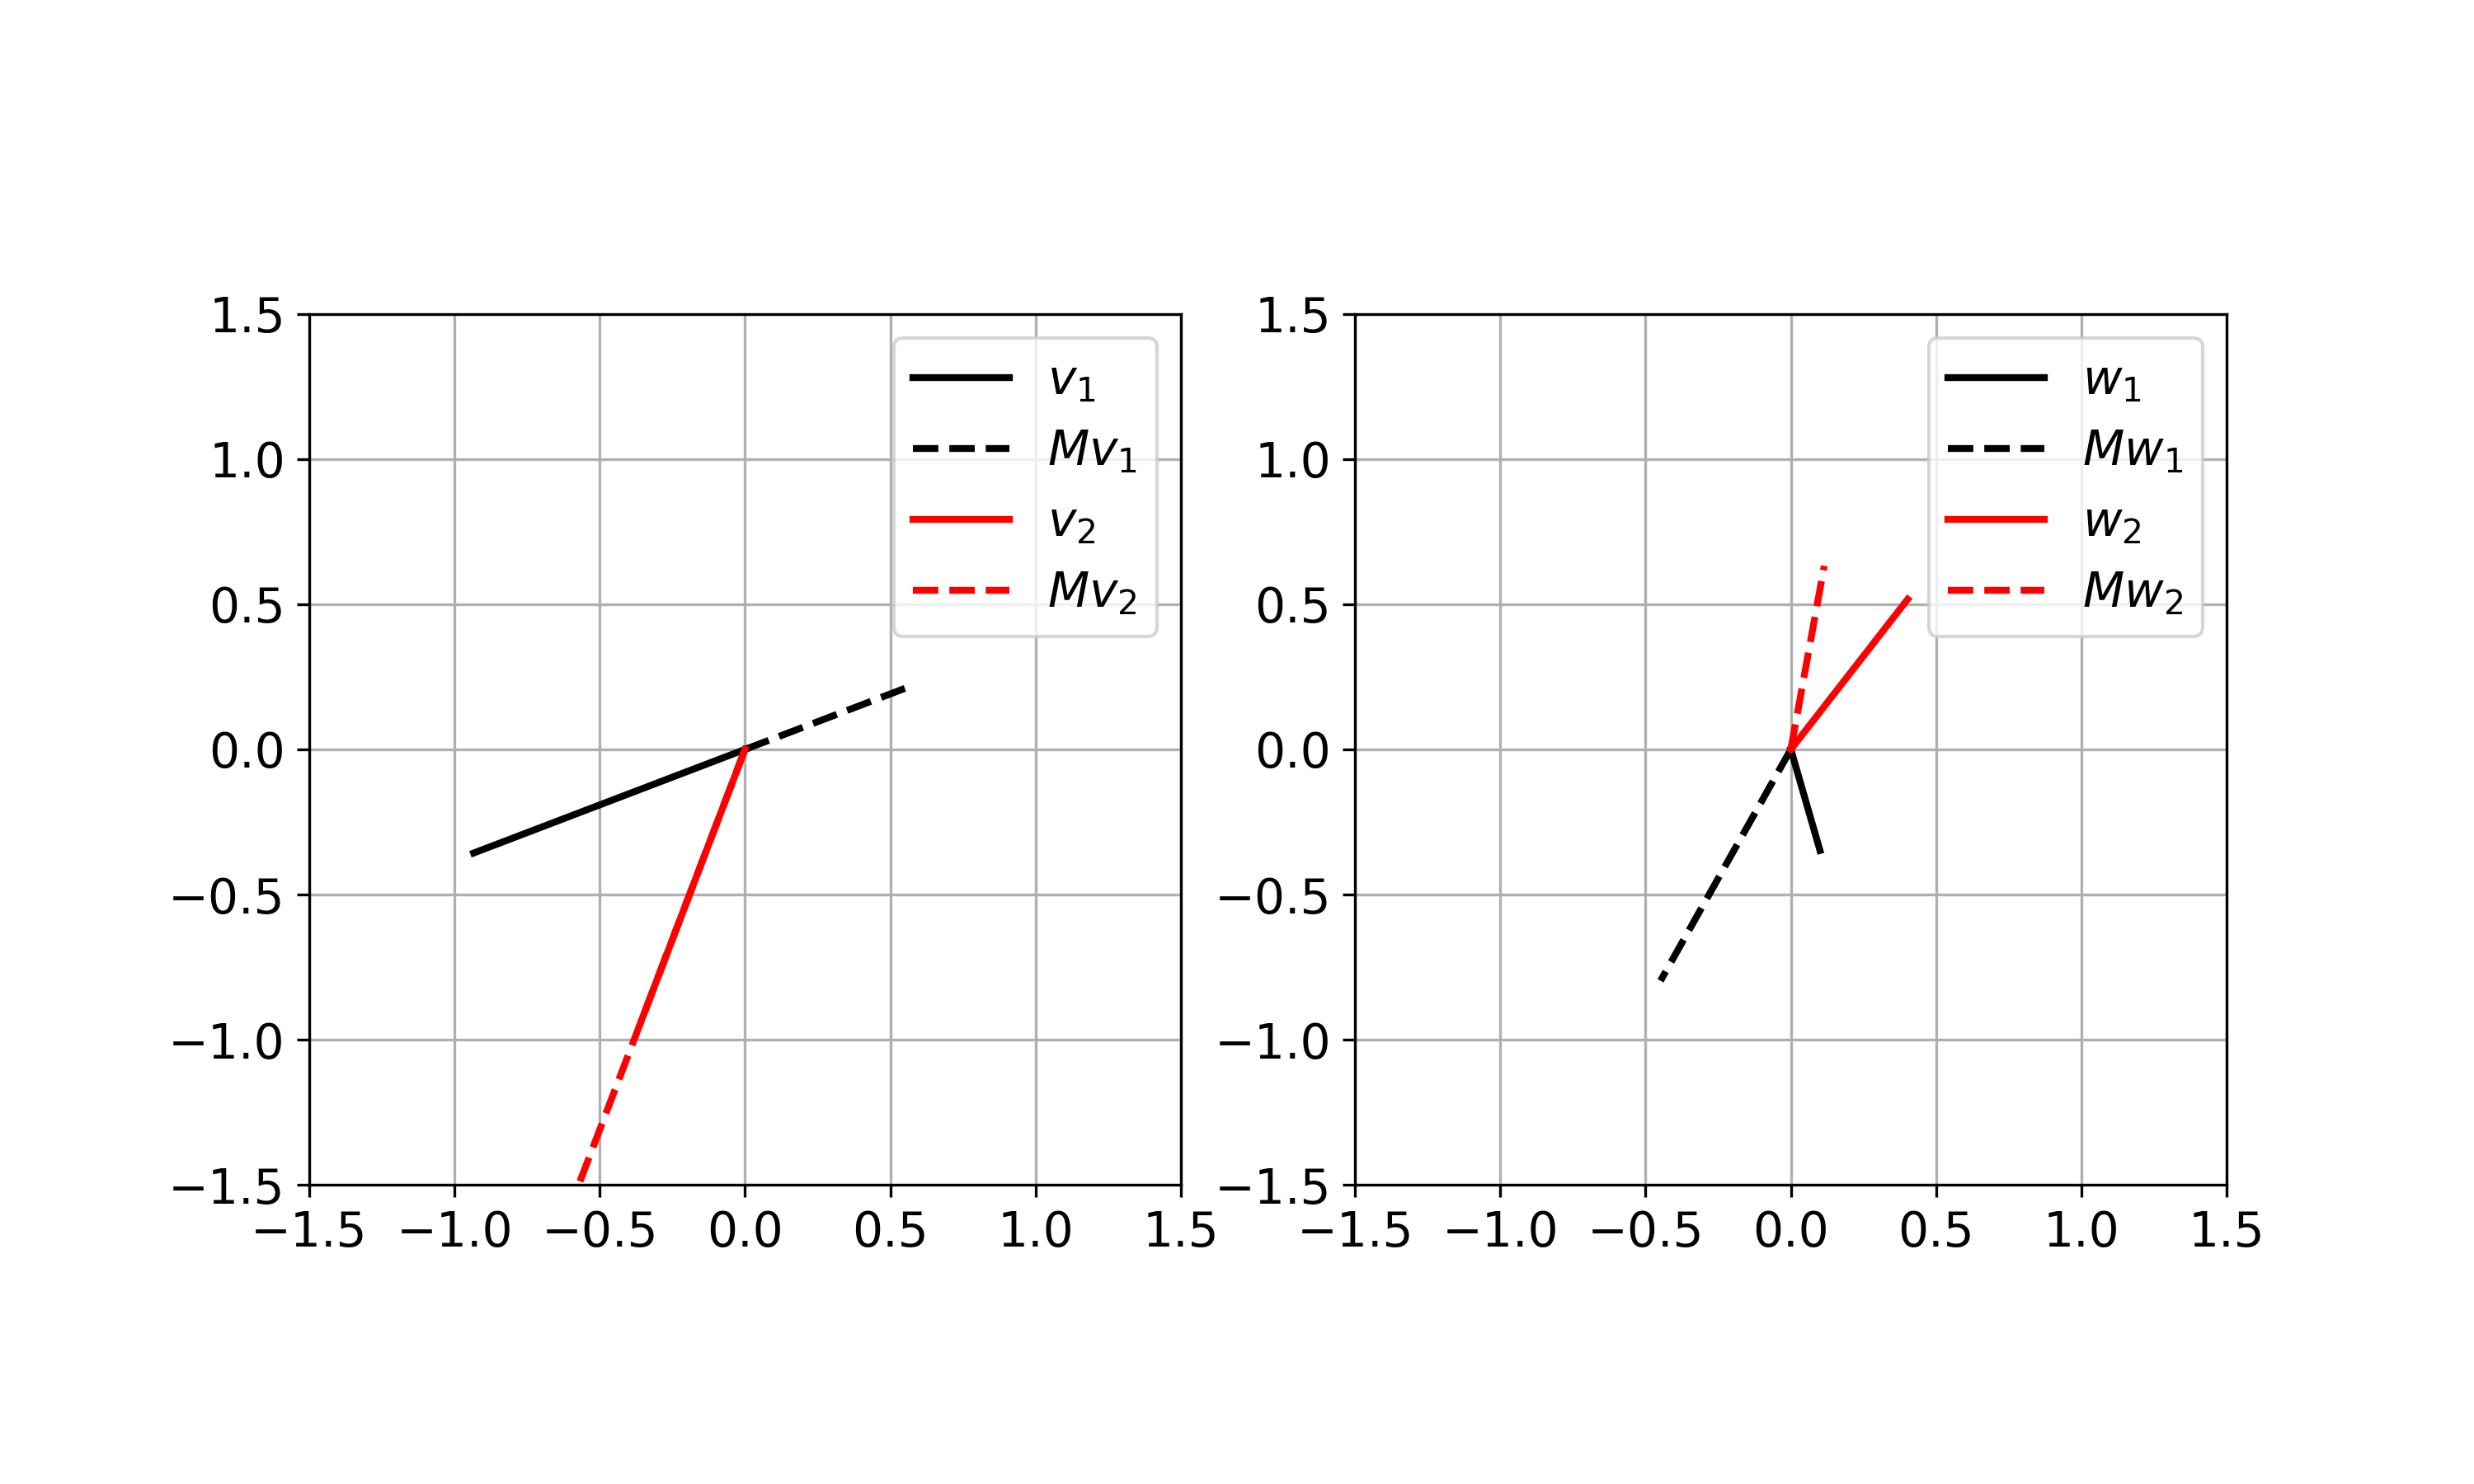

<br>

### 주성분 분석
- 변수 간의 관계를 파악하는데, 수십, 수백개의 변수가 포함된 다변량 데이터 결합에서는 이변량 상관관계로는 전체적인 패턴을 파악할 수 없음
    
- **주성분 분석에서 Scree Plot : 데이터 집합의 공분산 행렬의 고윳값 그래프**
    - Scree Plot을 주성분의 개수를 선택할 수 있음

<br>

### 잡음 감쇠
- 잡음 : 설명할 수 없거나 (무작위 변동 등) 원치 않는 데이터 집합의 분산을 의미
- 무작위 잡음을 줄이는 한 가지 방법은 시스템의 고윳값과 고유벡터를 식별한 다음, 작은 고윳값과 관련된 데이터 공간에서 방향을 '투영'하는 것
    
    즉, 무작위 잡음이 전체 분산에 기여하는 바가 상대적으로 작다고 가정

<br>

- 데이터 차원을 투영한다는 것은, 임곗값보다 낮은 일부 고윳값을 0으로 설정한 후, 데이터 집합을 재구성

<br>

### 차원 축소 (데이터 압축)
- 압축 : 데이터 품질에 미치는 영향을 최소화하면서, 데이터의 크기를 줄이는 것
- 데이터 집합의 차원을 줄이는 한 가지 방법은 고윳값 분해를 수행한 다음,

    데이터 공간의 작은 방향과 연관된 고윳값과 고유벡터를 삭제하고,
    
    상대적으로 큰 고유벡터와 고윳값 쌍만 전송
    
<br>

- **즉, 모든 데이터 압축은 데이터 집합을 데이터의 가장 중요한 특성을 나타내는 기준벡터 집합으로 분해한 다음, 원본 데이터의 고품질 형태로 재구성**

<br>

## 12.02. 고윳값 구하기
- **고윳값을 찾은 다음 각 고윳값을 사용하여, 해당 고유벡터를 탐색**



<br>

#### 행렬의 고윳값을 알아내는 방법

$$Av = \lambda v \tag{1}$$

$$\downarrow$$

$$Av - \lambda v=0 \tag{2}$$

$$\downarrow$$

- (2)에서 왼쪽에 두 개의 벡터 항이 모두 $v$를 포함. 하지만 $A$는 행렬, $\lambda$는 스칼라
    
    **$\rightarrow$ 따라서, $A$ 행렬에서 $\lambda$ 스칼라만큼 이동한 형태를 계산**
    
$$\downarrow$$

- **(3)은 고유벡터가 고윳값에 의해 이동된 행렬의 영공간에 존재함을 의미**

$$(A-\lambda I)v=0 \tag{3}$$

- 또한

$$\tilde{A} = A - \lambda I $$

$$\tilde{A}v = 0$$

<br>

### 특성 다항식 (characteristic polynomial)
- **특성 다항식 : 고윳값으로 이동된 행렬의 행렬식을 0으로 둔 것**

<br>

- **특이 행렬만이 자명하지 않은 (nontrivial) 영공간을 갖기 때문에, 고윳값에 의해 이동된 행렬은 특이 행렬**
- **특이 행렬의 행렬식은 0**

    $$| A - \lambda v | = 0$$
    
    <br>
    
    - $2 \times 2$ 고윳값에 의해 이동됭 행렬의 행렬식 
        - **2차 다항식 $\rightarrow$ 2개의 해 $\rightarrow$ 2개의 고윳값**
        
        $$\begin{vmatrix} \begin{bmatrix} a&b\\c&d \end{bmatrix} - \lambda \begin{bmatrix} 1&0\\0&1 \end{bmatrix} \end{vmatrix} = 0$$
        
        $$\begin{vmatrix} a-\lambda & b\\ c&d-\lambda \end{vmatrix} = 0$$
        
        $$ (a-\lambda)(d-\lambda) - bc = 0$$
        
        $$\lambda^2 - (a+d)\lambda + (ad-bc) = 0$$
        
    <br>
    
    
#### $\rightarrow$ $M \times M$ 차원의 고윳값에 의해 이동된 행렬의 행렬식은 0,
#### $\rightarrow$ 특성 다항식은 $\lambda^M$항을 가짐
#### $\rightarrow$ $M$개의 고윳값을 가짐

<br>

### 고윳값 계산 원리와 특성
1. **행렬-벡터 곱셈에서 벡터가 행렬의 고유벡터라면, 결과 벡터는 회전하지 않으며**

    **특정 스칼라 $\lambda$가 벡터에 곱해진 형태를 가짐**
    
    **$\rightarrow$ 이때, 특정 스칼라 $\lambda$는 행렬의 고윳값**
    
<br>

2. **고유벡터는 고윳값에 의해 이동된 행렬의 영공간에 존재하며,**

    **고윳값 만큼 이동된 행렬 ($A-\lambda I$)는 특수 행렬**
   
    **$\rightarrow$ 고윳값 만큼 이동된 행렬의 행렬식은 0**

<br>

3. **고윳값 만큼 이동된 행렬의 행렬식을 0으로 두었을 때 이를 특성 다항식이라고 하며, 특성 다항식의 해는 모든 고윳값**

    **고윳값 만큼 이동된 행렬이 $M\times M$차원일 때, 고윳값은 $M$개**

<br>

#### `np.linalg.eig()`

- 고윳값과 고유벡터

In [6]:
matrix = np.array([
             [1,2],
             [3,4]
             ])

In [7]:
evals,evecs = np.linalg.eig(matrix)

print('고윳값 목록:')
print(evals)

print(f'\n고유벡터:')
print(evecs)

고윳값 목록:
[-0.37228132  5.37228132]

고유벡터:
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


- $Av$

In [8]:
matrix @ evecs[:, 0] 

array([ 0.30697009, -0.21062466])

- $\lambda v$

In [9]:
evals[0] * evecs[:, 0] 

array([ 0.30697009, -0.21062466])

- $Av-\lambda v = 0$

In [10]:
np.round(matrix @ evecs[:, 0]  - evals[0] * evecs[:, 0])

array([0., 0.])

<br>

## 12.03. 고유벡터 찾기

- **고유벡터가 고윳값에 의해 이동된 행렬의 영공간에 존재함**

    **$\lambda$만큼 이동한 행렬의 영공간에 있는 벡터 $v$ $\rightarrow$ 고유벡터**

$$(A-\lambda I)v=0 $$

$$v_i \in N(A-\lambda_i I)$$

<br>

#### 예시
- 행렬과 행렬의 고윳값

$$\begin{bmatrix} 1&2\\2&1 \end{bmatrix} \rightarrow \;\;\lambda_1 = 3,\;\;\lambda_2=-1$$

- 행렬의 고유벡터를 구하기 위하여, 행렬을 3만큼 이동,

    그 영공간에서 벡터를 탐색

$$\begin{bmatrix} -2&2\\2&-2 \end{bmatrix} \;\;\rightarrow \;\; \begin{bmatrix} -2&2\\2&-2 \end{bmatrix} \begin{bmatrix} 1\\1 \end{bmatrix} = \begin{bmatrix} 0\\0 \end{bmatrix}$$

- $\begin{bmatrix} 1\\1 \end{bmatrix}$은 고윳값 3과 관련된 행렬의 고유벡터

<br>

#### 실제 영공간 벡터 (행렬의 고유 벡터)의 계산
- **영공간 벡터는 가우스-조던 소거법을 사용하여 연립방정식을 계산**

    **계수 행렬은 $\lambda$만큼 이동된 행렬이고, 상수벡터는 영벡터**
    
<br>

- 실제 구현에서는 QR분해와 거듭 제곱법 등의 과정을 통해서 고윳값과 고유벡터를 찾는 데 보다 수치적으로 더 안정적인 방법 적용

<br>

### 고유벡터의 부호와 크기 불확정성
- $\begin{bmatrix} 1\\1 \end{bmatrix}$은 고윳값 3과 관련된 행렬의 고유벡터이며,

    **3으로 이동한 행렬의 영공간에 대한 기저이지만, 하지만 유일한 기저벡터는 아님**

<br>

- **벡터 $\begin{bmatrix} 1\\1 \end{bmatrix}$의 크기를 조정한 모든 벡터는 영공간의 기저가 될 수 있음**

    **즉, $v$가 행렬의 고유벡터라면, 0을 제외한 모든 실숫값 $\alpha$에 대해 $\alpha v$도 고유벡터**

<br>

- **가능한 영공간 기저벡터가 무한대라면,**

    **단 하나의 최상의 기저벡터는 라는건 없지만, 단위 정규화된 고유벡터가 존재**
    
    **또한, 고유벡터의 올바른 부호는는 불확정성을 가지고 있음**
    
    (PCA와 같은 응용에서는 부호를 할당하는 원칙이 존재하지만, 이는 해석을 용이하게 하기 위한 관습)

<br>

#### $A^{-1}$의 고유벡터는 $A$의 고유벡터와 같고, 고윳값은 $\lambda^{-1}$

- 정방행렬

In [39]:
A = np.random.randn(5,5)

- 역행렬

In [40]:
Ai = np.linalg.inv(A)

- 고윳값 분해

In [41]:
eigvals_A  = np.linalg.eig(A)[0]
eigvals_Ai = np.linalg.eig(Ai)[0]

In [42]:
print('A의 고윳값:')
print(np.sort(eigvals_A))

print(' ')
print('A역행렬의 고윳값:')
print(np.sort(eigvals_Ai))

print(' ')
print('A역행렬 고윳값의 역수:')
print(np.sort(1/eigvals_Ai))

A의 고윳값:
[-0.80904986-1.68634818j -0.80904986+1.68634818j  0.24346726-0.53775345j
  0.24346726+0.53775345j  1.41110556+0.j        ]
 
A역행렬의 고윳값:
[-0.23126733-0.48204351j -0.23126733+0.48204351j  0.69870486-1.54325042j
  0.69870486+1.54325042j  0.7086642 +0.j        ]
 
A역행렬 고윳값의 역수:
[-0.80904986-1.68634818j -0.80904986+1.68634818j  0.24346726-0.53775345j
  0.24346726+0.53775345j  1.41110556+0.j        ]


<br>

## 12.04. 정방 행렬의 대각화
- $M\times M$ 행렬에는 $M$개의 고윳값 방정식이 존재

$$Av_1 = \lambda_1 v_1$$
$$\vdots$$
$$Av_M = \lambda_M v_M$$

<br>

#### 행렬 고윳값 방정식
- **$\Lambda$ = 모든 고윳값들을 대각원소로 가진 대각행렬**

$$AV = V  \Lambda$$
$$A=V\Lambda V^{-1}$$
$$\Lambda = V^{-1}AV$$

#### $3\times 3$행렬의 대각화 형태

$$\begin{bmatrix} v_{11}&v_{21}&v_{31}\\v_{12}&v_{22}&v_{32}\\v_{13}&v_{23}&v_{33} \end{bmatrix} \begin{bmatrix} \lambda_1&0&0\\0&\lambda_2&0\\0&0&\lambda_3 \end{bmatrix} = \begin{bmatrix} \lambda_1 v_{11}&\lambda_2v_{21}&\lambda_3 v_{31}\\\lambda_1v_{12}&\lambda_2v_{22}&\lambda_3v_{32}\\\lambda_1v_{13}&\lambda_2v_{23}&\lambda_3v_{33} \end{bmatrix}$$

<br>

#### `np.diag(고유값목록)`

- $\Lambda$

In [11]:
D = np.diag(evals)
D

array([[-0.37228132,  0.        ],
       [ 0.        ,  5.37228132]])

- $AV$

In [12]:
LHS = matrix @ evecs

print(LHS)

[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]


- $V\Lambda$

In [13]:
RHS = evecs @ D

print(RHS)

[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]


<br>

## 12.05. 대칭 행렬의 특수성

<br>

### 직교 고유벡터
- **대칭 행렬에는 직교 고유벡터가 존재**

    **즉, 대칭 행렬의 모든 고유벡터는 모든 쌍이 직교**
    
<br>

- **또한, 대칭 행렬의 고유벡터 행렬은 직교 행렬**

$$V^T V= I$$

<br>

#### 대칭 행렬의 고유벡터 직교성

$$\lambda_1 v_1^T v_2 = (Av_1)^Tv_2 = v^T_1 A^T v_2 = v^T_1 \lambda_2 v_2 = \lambda_2 v^T_1 v_2$$

$$\downarrow$$

$$\lambda_1 v_1^T v_2 = \lambda_2 v^T_1 \lambda_2$$

$$\lambda_1 v^T_1 v_2 - \lambda_2 v^T_1 v_2 = 0$$

$$\downarrow$$

$$(\lambda_1 -\lambda_2)v^T_1 v_2 = 0$$

$$\downarrow$$

$$\lambda_1\text{와 } \lambda_2\text{는 서로 다른 고윳값이기에, } (\lambda_1 - \lambda_2) \neq 0$$

$$\text{즉, }v_1^T v_2 = 0  \text{ 이어야 하므로, 두 고유벡터가 직교함을 의미}$$


#### 위 증명은 비대칭 행렬의 경우 적용되지 않음
#### 따라서, 비대칭 행렬의 고유벡터는 반드시 직교해야 한다는 제약이 없음

<br>

#### 예시

- 임의의 대칭행렬

In [14]:
A = np.random.randint(-3,4,(3,3))
A = A.T@A
print(A)

[[  8 -12  -4]
 [-12  27   0]
 [ -4   0   8]]


- 고윳값 분해

In [15]:
L,V = np.linalg.eig(A)

- 모든 고윳값-고유벡터 쌍의 내적 = 0

In [16]:
print( np.dot(V[:,0],V[:,1]) )
print( np.dot(V[:,0],V[:,2]) )
print( np.dot(V[:,1],V[:,2]) )

2.220446049250313e-16
2.7755575615628914e-17
-5.551115123125783e-17


- $V^T V=I$

In [17]:
np.round( V.T@V ,10) 

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

<br>

### 실수 고윳값
- **대칭 행렬은 실수 고윳값을 가짐**

<br>

#### 대칭 행렬의 실수 고윳값

In [18]:
A = np.array([[-3, -3, 0],
              [-3, -2, 1],
              [ 0,  1, 2]])

In [19]:
L,V = np.linalg.eig(A)
L.reshape(-1,1)

array([[-5.59707146],
       [ 0.22606174],
       [ 2.37100972]])

<br>

#### 비대칭한 실수 행렬이 복소수 고윳값을 가지는 예시
- 모든 실수 항목이 있는 행렬도 복소수 고윳값을 가질 수 있음

In [20]:
A = np.array([[-3, -3, 0],
              [ 3, -2, 3],
              [ 0,  1, 2]])

- 2개의 복소수 고윳값과 하나의 실수 고윳값
    - 2개의 복소수 고윳값은 $\pm 2.85172624$의 켤레 복소수쌍

In [21]:
L, V = np.linalg.eig(A)
L.reshape(-1,1) 

array([[-2.744739  +2.85172624j],
       [-2.744739  -2.85172624j],
       [ 2.48947801+0.j        ]])

<br>

#### 복소수 고윳값은 행렬의 크기에 비례하는 반지름을 가진 원 안에 분포

In [44]:
nIter = 123
matsize = 42
evals = np.zeros((nIter,matsize),dtype=complex)

- $42 \times 42$ 무작위 행렬 123개의 고윳값을 추출하여, 행렬 크기의 제곱근으로 나눔

In [45]:
for i in range(nIter):
  A = np.random.randn(matsize, matsize)
  evals[i,:] = np.linalg.eig(A)[0] / np.sqrt(matsize)

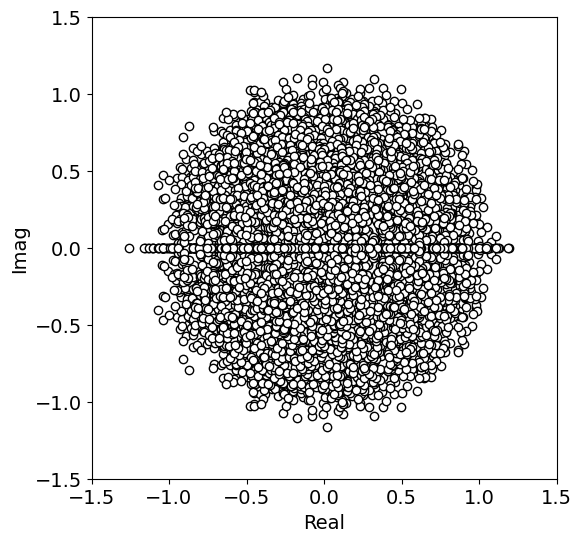

In [46]:
plt.figure(figsize=(6,6))

plt.plot(np.real(evals),np.imag(evals),'ko',markerfacecolor='white')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

<br>

## 12.06. 특이 행렬의 고윳값 분해
- **특이 행렬에서도 고윳값 분해는 정상적으로 동작**
- **고윳값중 적어도 하나의 고윳값은 0이 보장**

<br>

#### $3\times 3$의 계수-2 행렬 (특이 행렬)의 고윳값 분해 예시

In [22]:
A = np.array([[1,4,7],
              [2,5,8],
              [3,6,9]])

In [23]:
L,V = np.linalg.eig(A)

In [24]:
print( f'계수 = {np.linalg.matrix_rank(A)}\n' )

print('고윳값: ')
print(L.round(2)), print(' ')

print('고유벡터:')
print(V.round(2))

계수 = 2

고윳값: 
[16.12 -1.12  0.  ]
 
고유벡터:
[[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]]


<br>

## 12.07. 이차식, 정부호성 및 고윳값

<br>

### 행렬의 이차식 (quadratic form)
- **정방 행렬에 동일한 벡터 $w$를 앞뒤로 곱하여 스칼라를 얻음**

$$w^T A w =\alpha$$

<br>

#### 이차식의 핵심은 하나틔 특정 행렬과 가능한 모든 벡터의 집합(적절한 크기)를 사용하는 것
- 아래의 경우, $x$또는 $y$가 음수인 경우에도 제곱항 $2x^2$와 $3y^2$이 항상 교차항 ($4xy$)보다 크기에, 음이 될 수 있는 $x$와 $y$의 조합은 없으며, $x=y=0$일 때만 $\alpha$는 양이 아닐 수 있음

<br>

$$\begin{bmatrix} x&y \end{bmatrix} \begin{bmatrix} 2&4\\0&3 \end{bmatrix} \begin{bmatrix} x\\y \end{bmatrix} = 2x^2 + (0+4)xy + 3y^2$$

<br>

- 아래의 경우 $x$와 $y$값에 따라 양수 또는 음수 $\alpha$를 가질 수 있음

    $\begin{bmatrix} x&y \end{bmatrix}$를 $\begin{bmatrix} -1&1 \end{bmatrix}$로 설정하면, 음의 이차식 결과가 나오고 $\begin{bmatrix} -1&-1 \end{bmatrix}$로 설정하면 양의 결과가 나옴

$$\begin{bmatrix} x&y \end{bmatrix} \begin{bmatrix} -9&4\\3&9 \end{bmatrix} \begin{bmatrix} x\\y \end{bmatrix} = -9x^2 + (3+4)xy + 9y^2$$

<br>

#### 이차식이 모든 가능한 벡터에 대해 양수(또는 음수 또는 0) 스칼라를 생성하는지 확인
- **최대계수 고유벡터 행렬은 $\mathbb{R}^M$ 전체를 샏성하고, $\mathbb{R}^M$의 모든 벡터는 고유벡터의 선형 가중 결합으로 표현 가능**
    
    **고윳값 방정식에서 시작하여, 이차식으로 되돌아가도록 유도**
    
$$Av = \lambda v$$

$$v^TAv = \lambda v^T v$$

$$v^T Av = \lambda ||v||^2$$

- **$||v^T v||$는 양수 $\rightarrow$ 방정식의 우변의 부호가 전적으로 고윳값 $\lambda$에 의해 결정**

<br>

- **위 식이 각 고유벡터 고윳값 쌍에 대해 유효하다면, 모든 고유벡터 고윳값 쌍의 조합에 대해 유효**

<br>

$$v^T_1 A v_1 = \lambda_1 ||v_1||^2$$
$$v^T_2 A v_2 = \lambda_2 ||v_2||^2$$

$$\downarrow$$

$$(v_1 + v_2)^T A (v_1 + v_2) = (\lambda_1 + \lambda_2) ||(v_1 + v_2)||^2$$

$$\mu^T A \mu = \zeta ||\mu||^2$$

<br>

- **즉, $\mu$를 고유벡터의 선형 조합으로, 스칼라 $\zeta$를 고윳값의 선형 조합으로 설정**

<br>

#### $\lambda$의 부호에 대한 다양한 가정

1. **모든 고윳값이 양수**
- 식의 우변은 항상 양수이며, 모든 벡터 $v$에 대해 $v^T A v$가 항상 양수라는 것을 의미

<br>

2. **고윳값이 양수이거나 0**
- $v^T A v$는 음수가 아니며, $\lambda = 0$ (특이 행렬일 때)이면 0이 됨

<br>

3. **고윳값이 음수이거나 0**
- 이차식의 결과가 0이거나 음수

<br>

4. **고윳값이 음수**
- 모든 벡터에 대해 이차식 결과가 음수

<br>

### 정부호성 (definiteness)
- **정부호성은 정방 행렬의 특성으로 행렬의 고윳값의 부호에 의해 정의되며, 이차식 결과의 부호와 동일**

<br>

- 정부호성에는 다섯 가지 범주가 존재
    - \+ 및 \- 기호는 고윳값의 부호를 나타냄
    - Depends : (의존), 행렬의 숫자에 따라 행렬이 가역적이거나 특이적일 수 있음을 의미하며, 정부호성 범주에 따라 달라지지 않음

| $범주$ | $이차식$ | $고윳값$ | $가역성$ |
| - | - | - | - | 
| 양의 정부호 | 양수 | $+$ | $Y$ |
| 양의 준정부호 | 양수가 아님 | $+\;and\;0$ | $N$ |
| 부정부호 | 양수와 음수 | $+\;and\;-$ | $Depends$ |
| 음의 준정부호 | 양수가 아님 | $-\;and\;0$ | $N$ |
| 음의 정부호 | 음수 | $-$ | $Y$ |

<br>

### $A^T A$는 양의 (준)정부호
- **행렬과 그 전치의 곱으로 표현될 수 있는 모든 행렬 (즉 $S = A^TA$)은 양의 정부호 또는 양의 준정부호가 보장**

    **$\rightarrow$ 양의 (준)정부호**
    
<br>

- 모든 데이터 공분산 행렬은 데이터 행려에 그 전치를 곱한 값으로 정의되기 때문에, 양의 (준)정부호

    **즉, 모든 공분산 행렬은 음이 아닌 고윳값을 가짐**
    
    <br>
    
    - **데이터 행렬이 최대계수 (데이터가 설명 변수들의 관측치로 저장된 경우 열계수가 설명변수의 개수와 동일)라면, 고윳값은 모두 양수이며**
   
       **데이터 행렬이 축소계수인 경우 고윳값이 0인 값이 하나 이상 존재**

<br>

#### $S$에 대한 양의 (준)정부호성 증명

$$w^T S w= w^T (A^T A)w$$

$$= (w^T A^T)(Aw)$$

$$=(Aw)^T (Aw)$$

$$=||Aw||^2$$

- **$A^T A$의 이차식은 행렬의 제곱에 벡터를 곱한 값과 동일하며, 그 크기는 음수가 될 수 없으며 벡터가 0일 때만 0이 될 수 있음**

    **또한, 0이 아닌 $w$에 대해 $Aw = 0$이면 $A$는 특이 행렬**
    
<br>

- **모든 $A^T A$행렬은 대칭이지만, 모든 대칭 행렬은 $A^T A$로 표현할 수 있는 것은 아님**

    **즉, 모든 대칭 행렬이 행렬과 그 전치의 곱으로 표현될 수 있는 것은 아니기 때문에, 행렬 대칭 자체만으로는 양의 (반)정부호를 보장할 수 없음**

<br>

## 12.08. 일반화된 고윳값 분해
- **일반화된 고윳값 분해는 단위 행렬을, 단위 행렬이나 영 행렬이 아닌 다른 행렬로 대체**

$$Av = \lambda I v, \;\;\; Av = \lambda B v,\;\;\;\dots$$


- **일반화된 고윳값 분해는 두 행렬의 동시 대각화 (simultaneous diagnalization of two matrices)라고도 함**

<br>

- **결과 $(\lambda, v)$쌍은 $A$만의 고윳값과 고유벡터가 아니며, $B$만의 고윳값과 고유벡터도 아니며,**

    **두 행렬은 고윳값과 고유벡터 쌍을 공유**


<br>

- **일반화된 고윳값 분해는 곱 행렬의 '정규화된' 고윳값 분해로 간주할 수 있음**
    - 이는 개념적인 것일 뿐, 실제로는 일반화된 고윳값 분해에서  $B$가 가역적일 필요는 없음

$$C = AB^{-1}$$
$$Cv = \lambda v$$

<br>

- 항상 두 행렬을 동시에 대각화 할 수 있는 것은 아니지만, $B$가 양의(준)정부호라면 가능

<br>

#### `scipy.linalg.eigh()`

- 상관된 행렬 생성

In [30]:
n = 4

A = np.random.randn(n,n)
A = A.T@A
print(A, '\n')

B = np.random.randn(n,n)
B = B.T@B + A/10
print(B)

[[ 2.0117845   1.29050126 -0.48044445  0.63350595]
 [ 1.29050126  2.00274507  2.5141611   1.6693077 ]
 [-0.48044445  2.5141611   9.95932704  4.90558042]
 [ 0.63350595  1.6693077   4.90558042  3.28345906]] 

[[11.31067617  2.35124189  6.09308415  6.83083941]
 [ 2.35124189  2.66650978  2.2816617   3.52209283]
 [ 6.09308415  2.2816617   6.79302852  4.7748478 ]
 [ 6.83083941  3.52209283  4.7748478   8.41180002]]


In [31]:
from scipy.linalg import eigh

evals, evecs = eigh(A,B)
evals

array([0.02509356, 0.16006383, 1.10028729, 3.80211395])

In [32]:
evecs

array([[-0.29515036,  0.02685114, -0.06329299,  0.38338109],
       [ 0.26046498, -0.07423341, -0.82348725,  0.42163524],
       [-0.17046652, -0.17959611, -0.12789331, -0.50217567],
       [ 0.17589775,  0.43271196,  0.38458995, -0.27886915]])

<br>

#### 일반화된 고윳값 분해에서는 두 행렬이 대칭인 경우에도, 고유벡터는 직교하지 않음 ($V^{-1} \neq V^T$)
- $A$와 $B$가 모두 대칭이지만 $C=AB$가 대칭이 아니기 때문
- 그러나 고유벡터는 $B$에 대해 직교하므로, $V^T BV = I$

In [80]:
n = 5
A = np.random.randn(n,n)
A = A.T@A

B = np.random.randn(n,n)
B = B.T@B

In [81]:
evals, evecs = eigh( A,B )

- $V^T V \neq I$
- $V^T B V = I$

In [86]:
VV  = evecs.T @ evecs
VBV = evecs.T @ B @ evecs

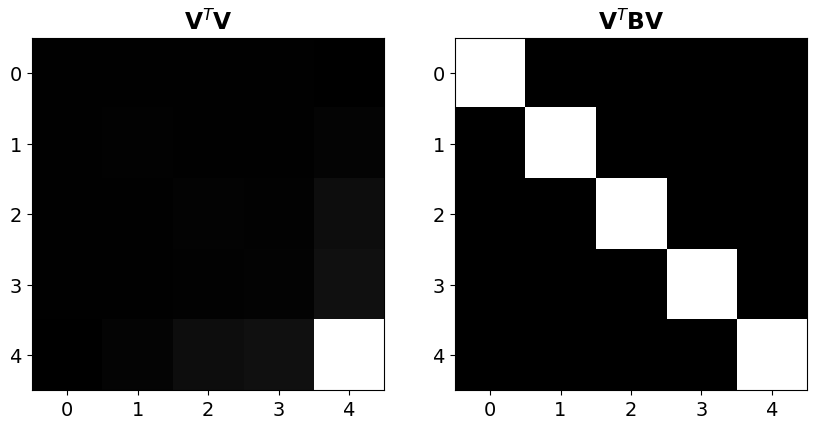

In [83]:
_,axs = plt.subplots(1,2,figsize=(10,6))

axs[0].imshow(VV,cmap='gray')
axs[0].set_title('$\mathbf{V}^T\mathbf{V}$')

axs[1].imshow(VBV,cmap='gray')
axs[1].set_title('$\mathbf{V}^T\mathbf{B}\mathbf{V}$')

plt.show()

<br>

### 백색화 (whitening)
- **신호 및 이미지 처리에서 상관관계를 제거**

<br>

#### 지정된 상관관계 구조로 데이터를 생성
- $V$와 $A$는 상관관계 행렬의 고유벡터와 고윳값
- $X$는 상관관계가 없는 난수 $N\times T$ 행렬

$$Y = V A^{1/2}X$$

<br>

- 아래 $R$과 같은 상관관계를 가지는 $3\times 10,000$차원의 데이터 생성

In [56]:
R = np.array([[ 1,.2,.9],
              [.2, 1,.3],
              [.9,.3, 1] ])

print(R)

[[1.  0.2 0.9]
 [0.2 1.  0.3]
 [0.9 0.3 1. ]]


- $V$, $A$계산

In [57]:
d, V = np.linalg.eig(R)
D = np.diag(d)


- $V A^{1/2} X$
    - X = $3\times 10,000$차원의 난수

In [58]:
X = V @ np.sqrt(D) @ np.random.randn(3, 10000)

np.corrcoef(X)

array([[1.        , 0.19557294, 0.90108691],
       [0.19557294, 1.        , 0.3009302 ],
       [0.90108691, 0.3009302 , 1.        ]])

<br>

### 백색화
$$\tilde{Y} = Y^T V A^{-1/2}$$

In [59]:
Y = X.T @ V @ np.linalg.inv(np.sqrt(D))

- **백색화된 데이터의 상관관계는 단위 행렬에 가까운 형태 $\rightarrow$ 데이터의 열간 상관관계가 거의 없음**

In [60]:
np.round( np.corrcoef(Y.T), 3)

array([[ 1.   ,  0.002, -0.008],
       [ 0.002,  1.   , -0.016],
       [-0.008, -0.016,  1.   ]])